# **DIC-101 Introduction to OpenAI API**

## **Welcome, 💓**

dear participants, to our **DIC-101: Introduction to OpenAI API** course.

In this concise workbook, I'll walk you through the **key concepts** around OpenAI API keys and guide you through their **basic usage**.

**Getting your hands dirty** and **play with LLMs** is exactly what we want!

So, without further due, let's dive in!

© Wenbo Lu. For inquiries, please contact steve.lu@nyu.edu. All rights reserved. Unauthorized use for commercial purposes is prohibited.

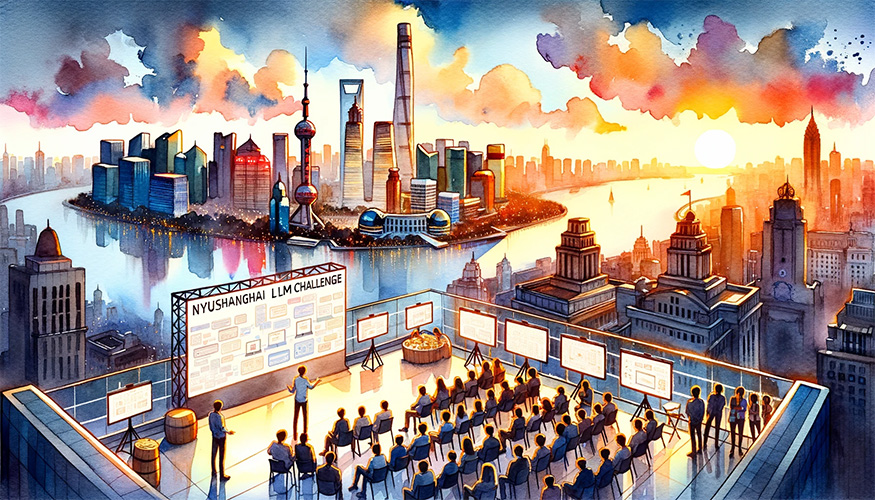--Painted with DALL·E 3

### **1. Wait! What are API keys?**

An API Key is akin to a unique password that allows different software applications to communicate with each other.

Here for **OpenAI API**, this key grants you **programmatic access** to the vast capabilities of models like **gpt-3.5-turbo-0613**.

### **2. What do you mean by programmatic access? And what on earth is "gpt-3.5-turbo-0613"?** (such a long name)

**Programmatic access** makes it possible for you to integrate LLMs into your own program. And you are going to see **programmatic access** in flesh right away, I promise.

As for **gpt-3.5-turbo-0613**, we have to first see the difference between **ChatGPT** and **gpt-3.5-turbo-0613**.

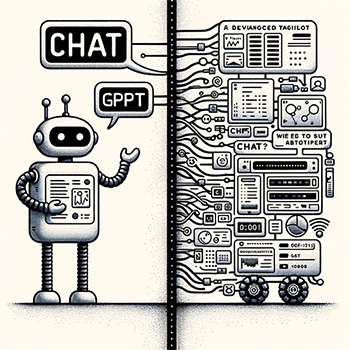--Painted with DALL·E 3

### **3. Differentiating Between ChatGPT, and gpt-3.5-turbo-0613**

- **ChatGPT**:
  - An **LLM product** designed for direct interactions with OpenAI's GPT-3.5 models.

- **gpt-3.5-turbo-0613**:
  - A tuned **large language model**.

So, when we are referring to **ChatGPT**, we are NOT talking about a LLM, but a **product**.

And behind the scenes of **ChatGPT**, it is also calling the ***OpenAI API****, and use the **gpt-3.5-turbo model** to generate answer for you.


*(This may not be exactly the case, but simplified for easy understanding)

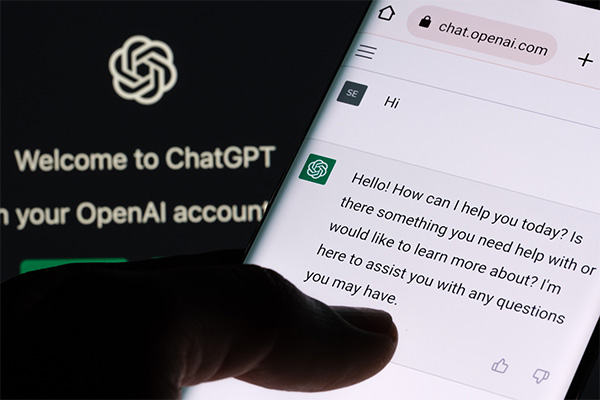--I am a product LOL.

### **4. Last lengthy explanation. I promise** 🤕

#### **Commen Question: When I was invited to the organization through the link in the email, what should I expect?**

**This means**

1. You can create API keys of your own. Through the API keys, you get the access to [a series of powerful models provided by OpenAI](https://platform.openai.com/docs/models/overview). Make good use of them.

**This does not mean**

1. Having a subscription to GPT-Plus or whatsoever.


 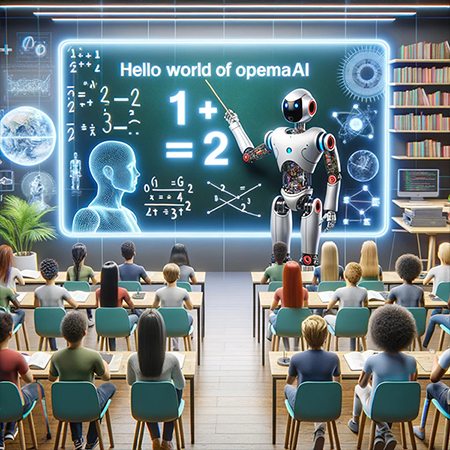 --Painted with DALL·E 3

### **5. Let's run the "Hello World" for LLMs!**


#### Do ***Copy*** the API Key and ***store it properly***, you will be ***ONLY*** shown once.

#### Create a new API Key, if you forget it. But ***delete*** the old one before you do so.

## Get your [OpenAI API Key](https://platform.openai.com/account/api-keys)

In case you have run into any problem, refer to the [User Manual for DIC2023 OpenAI API](https://docs.google.com/document/d/1MISIgDJHRAobRhc-9NYzI0AGXSEDrb0nddlg5kxClzM/edit?usp=sharing) kindly provided by me,

or, **pose your question to the groupchat** (your questions may also be others')🙂

In [1]:
%%capture
%pip install openai
%pip install dotenv
import os
import openai

### For temporary use: You can paste your API keys here

## **↓** ***RUN*** **the cell below** and fill in the blacks with your ***API***

In [26]:
# include your api key explicitly in the code is NOT recommended
openai.api_key = input('Put the API key your copied over here --> ')

Put the API key your copied over here --> s


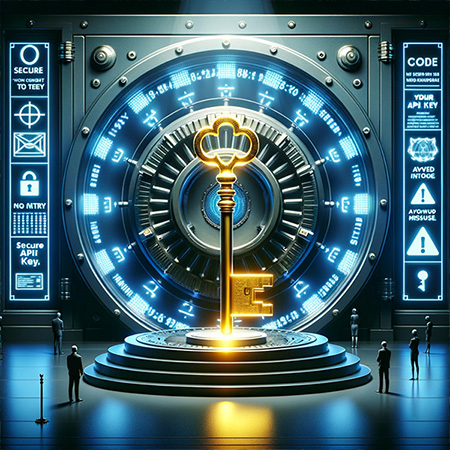 --Painted with DALL·E 3

### Best Practice: Store your API key as an environment variable

This [tutorial ](https://help.openai.com/en/articles/5112595-best-practices-for-api-key-safety)shows you how to do it, in case you are not familiar with environment variable.

In [8]:
# this reads the your API key from the environment variable
if openai.api_key is None:
  # from dotenv import load_dotenv, find_dotenv
  # _ = load_dotenv(find_dotenv()) # read local .env file
  try:
    openai.api_key = os.environ['OPENAI_API_KEY']
  except:
    print('''You didn't make your API key as an environment variable.''')

You didn't make your API key as an environment variable.


## **Let's try!**

Start with a direct API calls to OpenAI！

In [9]:
# This is the model that we are going to use
llm_model = "gpt-3.5-turbo"

In [10]:
# A function
def get_completion(prompt, model=llm_model):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response.choices[0].message["content"]

In [11]:
# Give the prompt as "What is 1+1?", and see what result it gives
get_completion("What is 1+1?")

'1+1 equals 2.'

### To get a clearer picture of what is going on, let's return everything we received from OpenAI

In [12]:
# let's check what is the the endpoint of the model returns
def get_completion_return_all(prompt, model=llm_model):
    messages = [{"role": "user", "content": prompt}]
    response = openai.ChatCompletion.create(
        model=model,
        messages=messages,
        temperature=0,
    )
    return response

In [13]:
return_value = get_completion_return_all("What is 1+1?")
return_value

<OpenAIObject chat.completion id=chatcmpl-8FvEOfkLoENkDkcBQ2fJMbQPeOFeF at 0x7ce0903aa430> JSON: {
  "id": "chatcmpl-8FvEOfkLoENkDkcBQ2fJMbQPeOFeF",
  "object": "chat.completion",
  "created": 1698805608,
  "model": "gpt-3.5-turbo-0613",
  "choices": [
    {
      "index": 0,
      "message": {
        "role": "assistant",
        "content": "1+1 equals 2."
      },
      "finish_reason": "stop"
    }
  ],
  "usage": {
    "prompt_tokens": 14,
    "completion_tokens": 7,
    "total_tokens": 21
  }
}

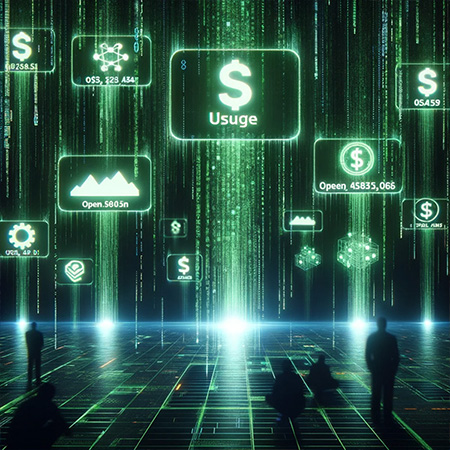 --Painted with DALL·E 3

### ***Usage*** is especially important here. It allows you to keep track of the token usage in real time.

#### So smart as you are, you must have noticed that we can get the ***Usage*** information similarly. Just like dealing with a **dictionary** (but actually there's some differences).

In [14]:
prompt_tokens, completion_tokens = return_value.usage['prompt_tokens'], return_value.usage['completion_tokens']

print("prompt_tokens:", prompt_tokens)
print("completion_tokens:", completion_tokens)

prompt_tokens: 14
completion_tokens: 7


#### It's worth noting that **Completion tokens** are charged **more** than **Prompt tokens**.

#### Therefore, to save expenses, it's mostly ideal to add a **"Be concise"**, to the end of your prompt.

For more information on the chat completion, please refer to [the OpenAI documentation.](https://platform.openai.com/docs/api-reference/chat)

## **Did you get the result? Wonderful!**

Now we can try something more interesting.

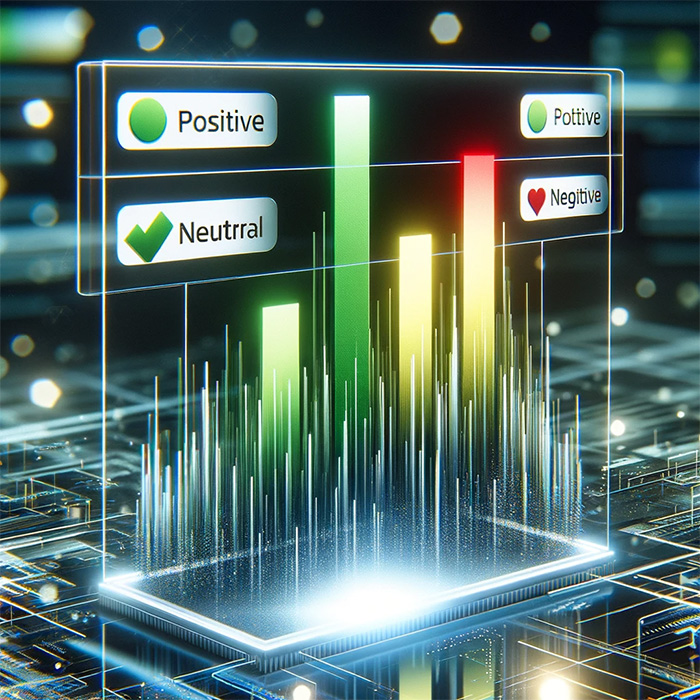 --Painted with DALL·E 3

## **Sentiment Analysis with OpenAI API**
If you wonder what is ["sentiment analysis"](https://aws.amazon.com/cn/what-is/sentiment-analysis/), click here

### Let's first load the data

In [15]:
import pandas as pd

In [16]:
# load twitter data from google drive provided
url='https://drive.google.com/file/d/1AXMTDM1G6RzBxp5zdSLwUm2cWXJwoXkH/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
data = pd.read_csv(url)

In [17]:
# take a look at the data
data.head()

,textID,comment,sentiment,Time of Tweet,Age of User,Country
0,1,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan
1,2,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania
2,3,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria
3,4,happy bday!,positive,morning,46-60,Andorra
4,5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola


### 1.   **Comment**: comments on Twitter
### 2.   **sentiment**: human-labelled sentiment

### Then we define a function call **"get_sentiment"** using gpt-3.5-turbo through your API key

In [18]:
model = "gpt-3.5-turbo"
prompt = "Comment: {} \n Output sentiment(positive, neutral, negative): <response>>"

In [19]:
# Define a function to get sentiment using OpenAI
def get_sentiment(comment):
    response = openai.ChatCompletion.create(
        model=model,
        messages=[{
            "role": "user",
            "content": prompt.format(comment)
            }],
    )
    return response.choices[0]['message']['content']

In [20]:
# Get sentiment for the first comment
get_sentiment(data['comment'][0])

'neutral'

### Did it work? How amazing!

### **Now let's test its performance! How accurate is it?**

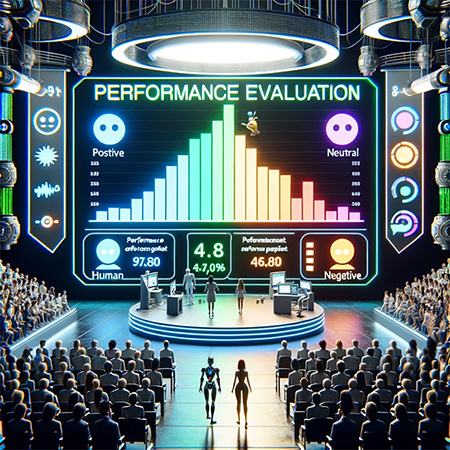 --Painted with DALL·E 3

In [21]:
# accuracy evaluated on top 10 comments
predictions = []
for index in range(10):
    prediction = get_sentiment(data['comment'][index])
    predictions.append(prediction)
    print(f"{index} Comment: {data['comment'][index]}\nSentiment: {data['sentiment'][index]} Prediction: {prediction}\n")
accuracy = sum(predictions == data['sentiment'][:10])/10
print(f"Accuracy: {100 * accuracy}%")

0 Comment: Last session of the day  http://twitpic.com/67ezh
Sentiment: neutral Prediction: neutral

1 Comment:  Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China:  (SH)  (BJ).
Sentiment: positive Prediction: The output sentiment for the comment "Shanghai is also really exciting (precisely -- skyscrapers galore). Good tweeps in China: (SH) (BJ)" is positive.

2 Comment: Recession hit Veronique Branquinho, she has to quit her company, such a shame!
Sentiment: negative Prediction: negative

3 Comment:  happy bday!
Sentiment: positive Prediction: positive

4 Comment:  http://twitpic.com/4w75p - I like it!!
Sentiment: positive Prediction: positive

5 Comment:  that`s great!! weee!! visitors!
Sentiment: positive Prediction: positive

6 Comment: I THINK EVERYONE HATES ME ON HERE   lol
Sentiment: negative Prediction: negative

7 Comment:  soooooo wish i could, but im in school and myspace is completely blocked
Sentiment: negative Prediction: neutral

8 C

### Not too bad huh?

# **Great! Now it's your turn to show me amazing things!**

# **Make it happen! Dear contestants!**

## If you like the tutorial, you can support me by giving a [**star**](https://github.com/fruitswordman/NYUSH-DIC-2023-Introduction-to-OpenAI-API) to the tutorial.🤭

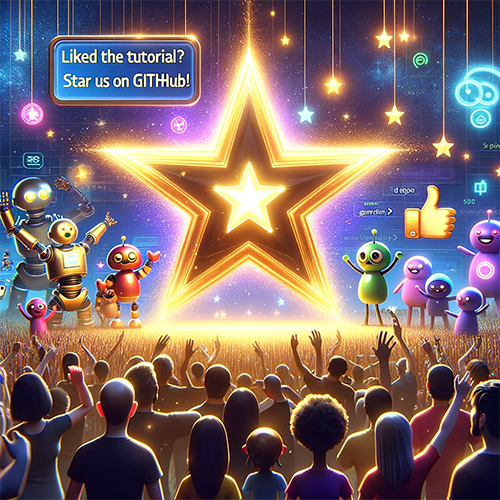 -Painted with DALLE·3